In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Loading the Datasets

In [3]:
# Load the datasets
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

### Preview about the datasets

In [4]:
# Preview the datasets
print("\nCustomers Data:")
print(customers.head())
print(customers.info())

print("\nProducts Data:")
print(products.head())
print(products.info())

print("\nTransactions Data:")
print(transactions.head())
print(transactions.info())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biogr

### Cleaning Data

In [5]:

# Data Cleaning

# Handle missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Remove duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Explorative Data Analysis

### Customers by Region

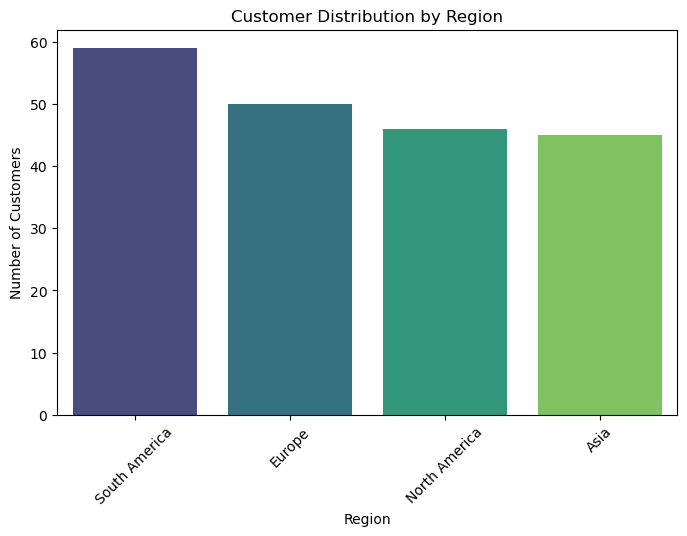

In [6]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Product Distribution by Categories

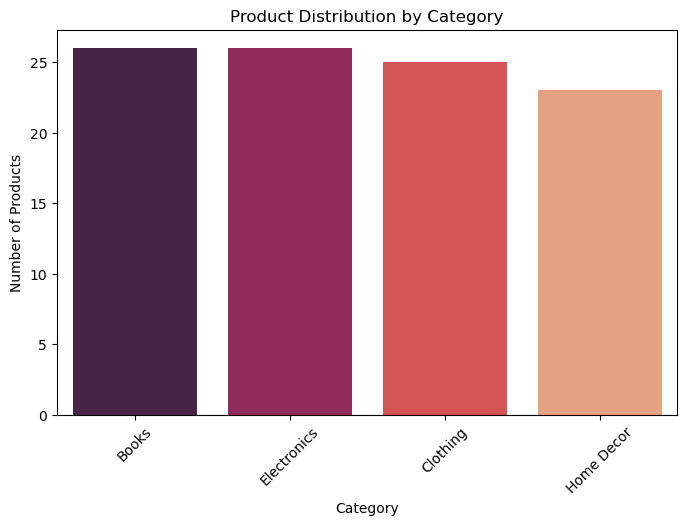

In [7]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='rocket')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

### Monthly Sales Trends

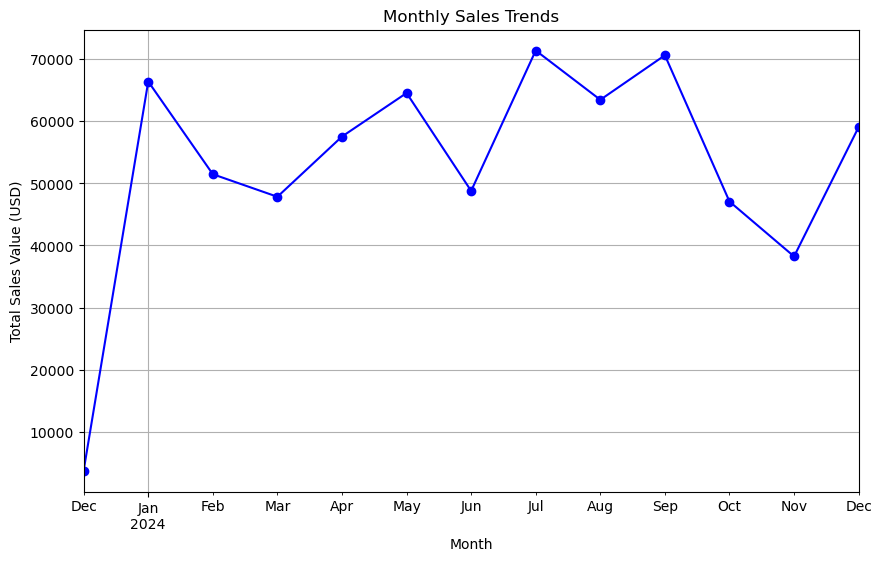

In [8]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (USD)")
plt.grid(True)
plt.show()

### Price vs Total Value of Transactions

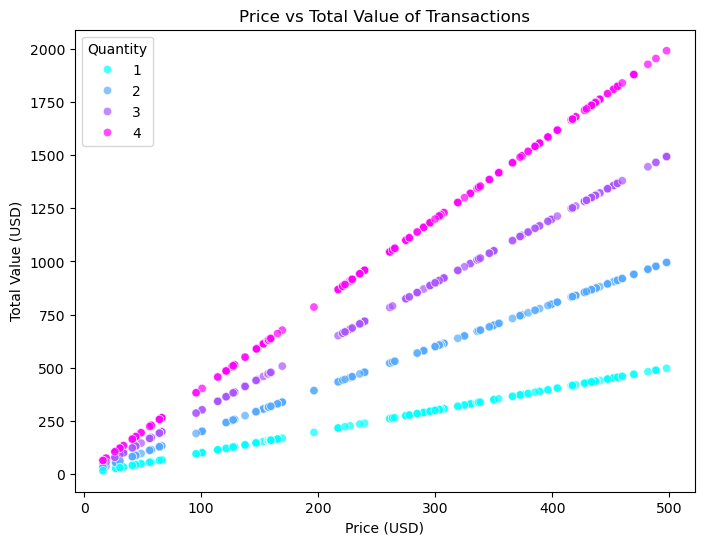

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=transactions['Price'], y=transactions['TotalValue'], hue=transactions['Quantity'], palette='cool', alpha=0.7)
plt.title("Price vs Total Value of Transactions")
plt.xlabel("Price (USD)")
plt.ylabel("Total Value (USD)")
plt.show()

### Top Customers by Total Spend

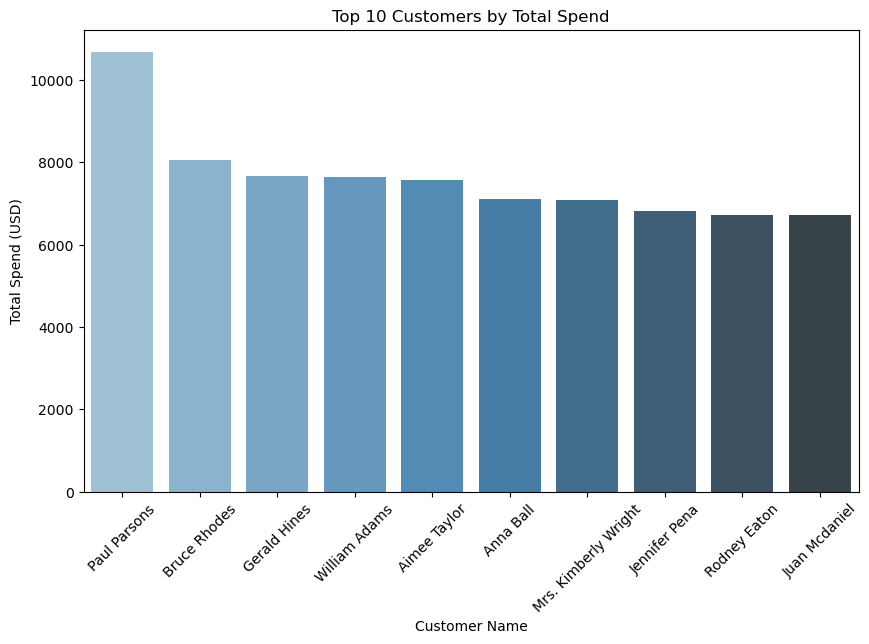

In [10]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers = top_customers.reset_index().merge(customers, on='CustomerID', how='left')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers['CustomerName'], y=top_customers['TotalValue'], palette='Blues_d')
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer Name")
plt.ylabel("Total Spend (USD)")
plt.xticks(rotation=45)
plt.show()

### Top Products by Revenue

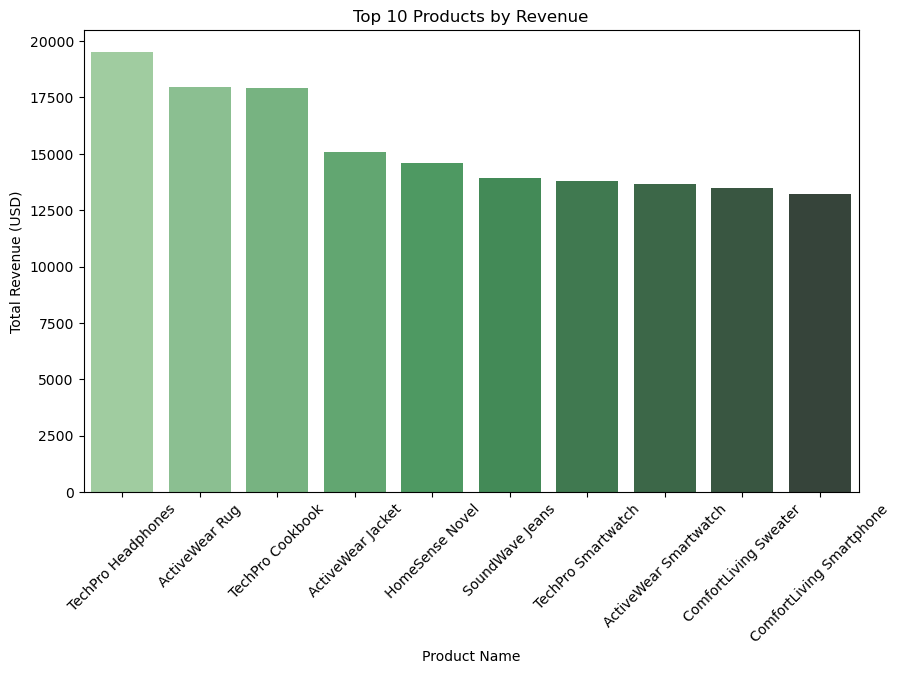

In [11]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID', how='left')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products['ProductName'], y=top_products['TotalValue'], palette='Greens_d')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

### Average Order Value by Region

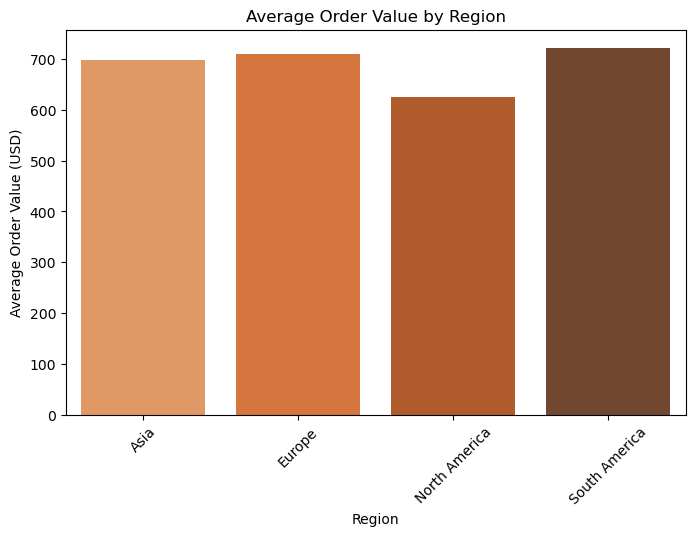

In [12]:
regional_aov = transactions.merge(customers, on='CustomerID', how='left').groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=regional_aov.index, y=regional_aov.values, palette='Oranges_d')
plt.title("Average Order Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Order Value (USD)")
plt.xticks(rotation=45)
plt.show()

### Most Frequently Purchased Products

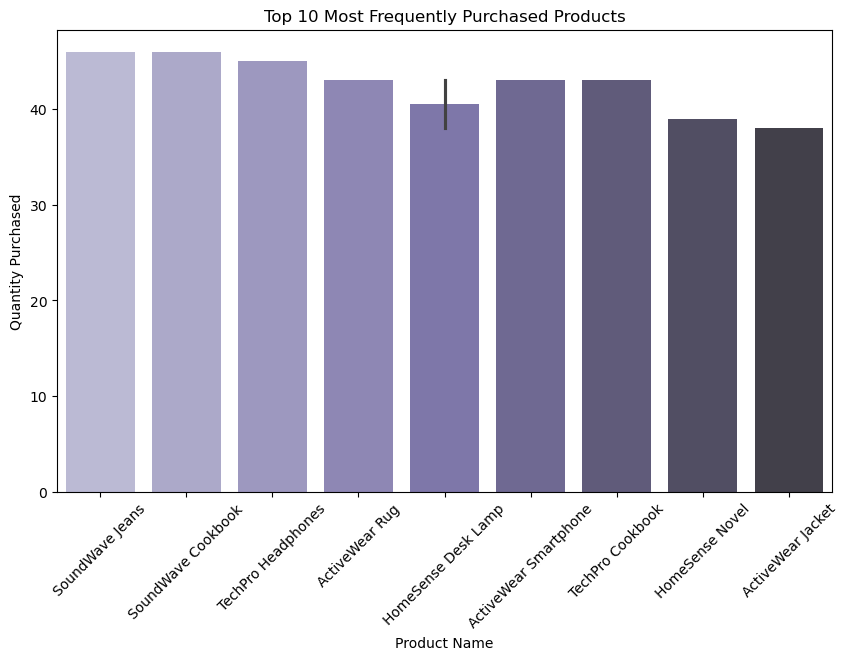

In [13]:
top_quantity_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_quantity_products = top_quantity_products.reset_index().merge(products, on='ProductID', how='left')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_quantity_products['ProductName'], y=top_quantity_products['Quantity'], palette='Purples_d')
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Purchased")
plt.xticks(rotation=45)
plt.show()

### Customer Lifetime Value Distribution

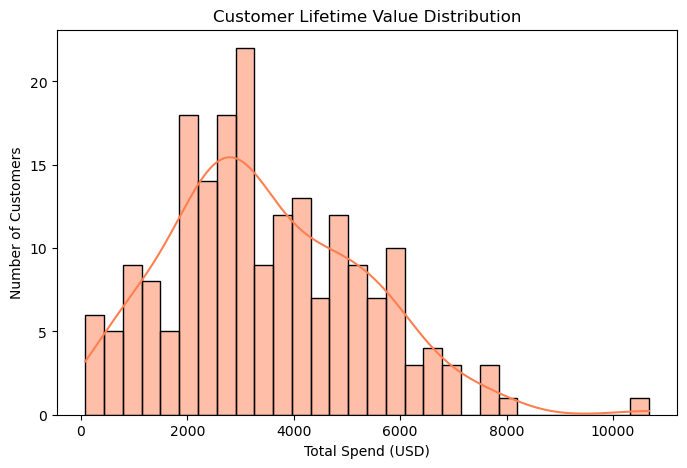

In [14]:
customer_lifetime_value = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
sns.histplot(customer_lifetime_value, kde=True, color='coral', bins=30)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("Total Spend (USD)")
plt.ylabel("Number of Customers")
plt.show()


### Revenue by Region

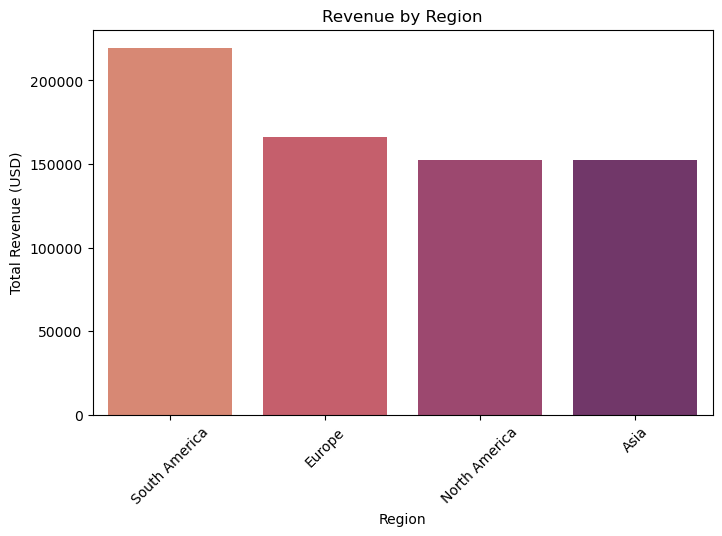

In [15]:
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='flare')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()


### Revenue Contribution by Product Category

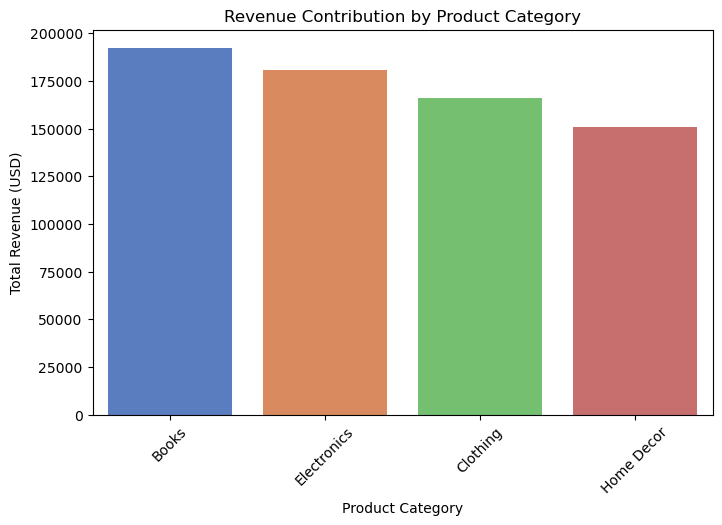

In [16]:
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='muted')
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()